# Abstract
Customer segmentation is a vital strategy for businesses seeking to tailor their marketing efforts and enhance customer satisfaction. By dividing customers into distinct groups based on shared characteristics, such as purchasing behavior, demographics, or preferences, businesses can better understand and meet the unique needs of each segment. This paper explores the process of customer segmentation and its significance in modern marketing. Through the application of data analysis techniques, including RFM (Recency, Frequency, Monetary) analysis and clustering algorithms such as K-means, businesses can identify meaningful customer segments and develop targeted marketing strategies to improve customer acquisition, retention, and loyalty.

# Introduction
This notebook aims at analyzing the content of an E-commerce database that lists purchases made by  ∼
 4000 customers over a period of one year (from 2010/12/01 to 2011/12/09).

# Importing Required Libraries 
Numpy For linear algebra |
Pandas For Data processing, CSV file I/O (e.g. pd.read_csv) |
Matplotlib For Data Visualizations

In [1]:
import numpy as np 
import pandas as pd 

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
file_path =  r'C:\Users\Viraj\OneDrive\Desktop\IPL Stats\retail_Dataset.csv'
retail_df = pd.read_csv(file_path,encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


# This dataframe contains 8 variables that correspond to: 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. <br>
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. Nominal. <br>
**Quantity**: The quantities of each product (item) per transaction. Numeric.	<br>
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling. <br>
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. Nominal, the name of the country where each customer resides.<br>

# Creating a new column "Amount" by multiplying "Quantity" and "Unit Price"

In [3]:
retail_df["Amount"]= retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08


# Counting Null Fields

In [4]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Amount              0
dtype: int64

# Datatypes of Features

In [5]:
retail_df.dtypes 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

# Brief summary for columns whose data types are NOT NUMBER

In [6]:
retail_df.describe(exclude="number")  

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478


# We can notice that most of the transactions are from the country United Kingdom

# Summary for columns whose data types are NUMBER



In [7]:
retail_df.describe() 

,Quantity,UnitPrice,Amount
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


# Number of rows and columns

In [8]:
retail_df.shape

(541909, 9)

# Converting a column's datatype to datetime

In [9]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [10]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Fetching proportions of Country with the parameter "normalize=True"

In [11]:
retail_df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

# Proportion of UK Customers

In [12]:
retail_df[retail_df["Country"]=="United Kingdom"].CustomerID.nunique() / retail_df.CustomerID.nunique()


0.903476669716377

# Observations:
90% of the customers are from UK

# Forming a sub-sample which includes only the customers from UK

In [13]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.shape

(495478, 9)

# Removing Cancelled Orders

In [14]:
retail_uk = retail_uk[retail_uk['Quantity']>0]
retail_uk.shape

(486286, 9)

# Removing rows where customerID are NA since going to do CUSTOMER SEGMENTATION



In [15]:
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True) 

retail_uk.shape

(354345, 9)

# Average total quantity ordered by a customer

In [16]:
np.mean(retail_uk.groupby("CustomerID").Quantity.sum())

1088.87324662076

# Average Total amount spent by a customer

In [17]:
np.mean(retail_uk.groupby("CustomerID").Amount.sum())

1863.9101132364192

# Explore the unique values of each attribute

In [18]:
print("Summary: ")
print("Number of invoices: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Average quantity of product purchased by a customer: ", round(np.mean(retail_uk.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(retail_uk.groupby("CustomerID").Amount.sum()), 2))
print("Average product quantity sold per transaction: ", round(retail_uk.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(retail_uk.Amount.mean(), 2) )

Summary: 
Number of invoices:  16649
Number of products bought:  3645
Number of customers: 3921
Average quantity of product purchased by a customer:  1089.0
Average revenue generated per customer:  1863.91
Average product quantity sold per transaction:  12.0
Average revenue generated per transaction:  20.63


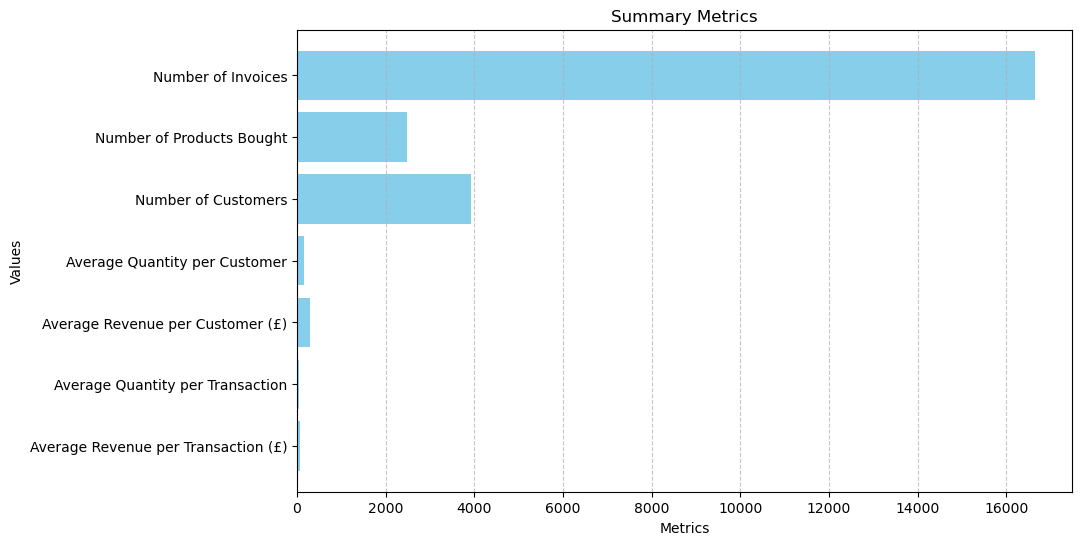

In [19]:
# Summary data
metrics = {
    'Number of Invoices': 16649,
    'Number of Products Bought': 2493,
    'Number of Customers': 3921,
    'Average Quantity per Customer': 167.0,
    'Average Revenue per Customer (£)': 293.3,
    'Average Quantity per Transaction': 39.0,
    'Average Revenue per Transaction (£)': 69.07
}

# Create lists to store metric names and values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(metric_names, metric_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Summary Metrics')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


In [20]:
#The average revenue generated per customer (£293.3) suggests a decent level of customer loyalty or repeat business. Higher average revenue per customer often indicates stronger customer relationships and potential for upselling or cross-selling strategies.

# check for NaN's values to see if dataset is ready to go



In [21]:

retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  object        
 7   Country      354345 non-null  object        
 8   Amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.0+ MB


# Create a new column called date which contains the date of invoice only

In [22]:
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [23]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [24]:
min(retail_uk['date'])

datetime.date(2010, 12, 1)

In [25]:
max(retail_uk['date'])

datetime.date(2011, 12, 9)

In [26]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

In [27]:
retail_uk['month'] = retail_uk['date'].dt.month

# Group the DataFrame by the 'month' column and count the number of transactions in each month
monthly_transaction_counts = retail_uk.groupby('month').size()

# Optionally, you can convert the month number to month names for better readability
# You can create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map month numbers to month names
monthly_transaction_counts.index = monthly_transaction_counts.index.map(month_names)

print("Frequency of transactions in each month:")
print(monthly_transaction_counts)

Frequency of transactions in each month:
month
January      18161
February     17759
March        24014
April        20866
May          25203
June         23714
July         23599
August       23105
September    35636
October      43735
November     58809
December     39744
dtype: int64


In [28]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

# Extract month and year from the date column
retail_uk['year_month'] = retail_uk['date'].dt.strftime('%b %Y')

# Group the DataFrame by the 'year_month' column and count the number of transactions in each month-year combination
monthly_transaction_counts = retail_uk.groupby('year_month').size()

# Sort the data month and year-wise
monthly_transaction_counts = monthly_transaction_counts.sort_index()

print("Frequency of transactions in each month and year (sorted):")
print(monthly_transaction_counts)

Frequency of transactions in each month and year (sorted):
year_month
Apr 2011    20866
Aug 2011    23105
Dec 2010    23943
Dec 2011    15801
Feb 2011    17759
Jan 2011    18161
Jul 2011    23599
Jun 2011    23714
Mar 2011    24014
May 2011    25203
Nov 2011    58809
Oct 2011    43735
Sep 2011    35636
dtype: int64


In [29]:
#We can now see that in november ,the amount of orders has been the highest

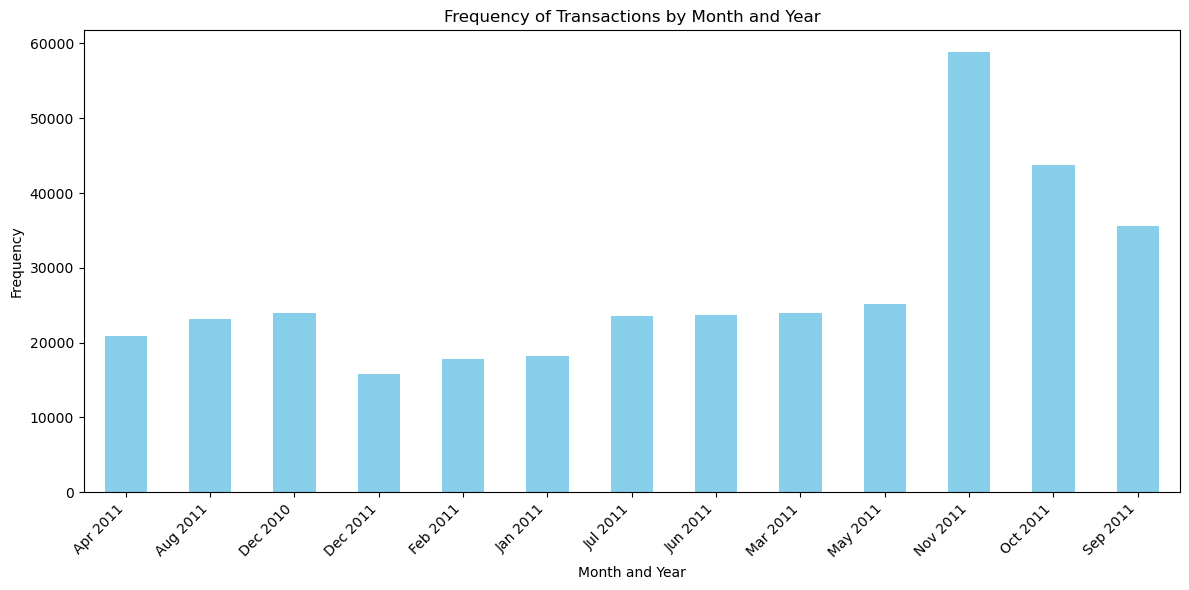

In [30]:
plt.figure(figsize=(12, 6))
monthly_transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Transactions by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Creating Recency DataFrame
group by customers and check the last date of purchase

In [31]:

recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head(20)


,CustomerID,LastPurshaceDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06
5,12821,2011-05-09
6,12822,2011-09-30
7,12823,2011-09-26
8,12824,2011-10-11
9,12826,2011-12-07


# Calculating Recency

In [32]:
now = dt.date(2011,12,9)
now = pd.Timestamp('2011-12-9')

# Calculate recency in days
recency_df['Recency'] = (now - recency_df['LastPurshaceDate']).dt.days

# Print the DataFrame to verify the result
print(recency_df)



     CustomerID LastPurshaceDate  Recency
0         12346       2011-01-18      325
1         12747       2011-12-07        2
2         12748       2011-12-09        0
3         12749       2011-12-06        3
4         12820       2011-12-06        3
...         ...              ...      ...
3916      18280       2011-03-07      277
3917      18281       2011-06-12      180
3918      18282       2011-12-02        7
3919      18283       2011-12-06        3
3920      18287       2011-10-28       42

[3921 rows x 3 columns]


In [33]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


# ...
This calculation will result in the 'Recency' column containing the number of days between the last purchase date for each customer and December 9, 2011 (the now date). This metric represents how recent each customer's last purchase was relative to the specified date.

# Dropping LastPurchaseDate as it is not needed anymore

In [34]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# Creating Frequency DataFrame
dropping duplicates

In [35]:
retail_uk.shape

(354345, 12)

In [36]:
# Assuming retail_uk is the DataFrame name
duplicate_transactions = retail_uk[retail_uk.duplicated(subset=['CustomerID', 'InvoiceNo'], keep=False)]

# Display the duplicate transactions
print(duplicate_transactions)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice CustomerID         Country  Amount  \

In [37]:
import pandas as pd

# Assuming retail_uk is the DataFrame name
# Calculate the count of products for each transaction
retail_uk['ProductCount'] = retail_uk.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].transform('count')

# Filter out duplicate transactions
filtered_retail_uk = retail_uk.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])

# Display the filtered DataFrame
filtered_retail_uk


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date,month,year_month,ProductCount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,12,Dec 2010,7
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12-01,12,Dec 2010,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12-01,12,Dec 2010,12
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010-12-01,12,Dec 2010,4
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010-12-01,12,Dec 2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581,United Kingdom,12.48,2011-12-09,12,Dec 2011,2
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011-12-09,12,Dec 2011,2
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011-12-09,12,Dec 2011,2
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011-12-09,12,Dec 2011,21


In [38]:
filtered_retail_uk.shape

(16649, 13)

# ...
After executing this code, the filtered_retail_uk DataFrame will contain only unique combinations of 'InvoiceNo' and 'CustomerID', effectively removing duplicate transactions associated with the same customer invoice.

# Calculating frequency of purchases

In [39]:
frequency_df = filtered_retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4
